In [1]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
import tqdm as tqdm
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation
import winsound
Freq = 1500 # Set Frequency To 2500 Hertz
Dur = 1000 # Set Duration To 1000 ms == 1 second


In [2]:
# t.sin(x)
# t.exp(x)
# 1/(1+t.exp(-x))
# t.log(1+t.exp(x))

R=t.pi

ReLu=t.nn.ReLU()

def step(x):
    n=x.size(0)
    O=t.zeros(n)
    for i in range(n):
        if x[i]>1:
            O[i]=1
        else:
            O[i]=0
    return O

def act(x):
    return ReLu(x)
#t.exp(-x**2)

def dact(x):
    return step(x)
#-2*x*t.exp(-x**2)

def ddact(x):
    return -t.sin(x)

def f(x):
    return t.sin(2*x)


def Error(c,w,b,x):
    a=0
    n=x.size(0)
    m=w.size(0)
    x=t.tensor([(i/n) for i in range(n)])
    for i in range(n):
        h=0
        for j in range(m):
            h=h+c[j]*act(w[j]*x[i]+b[j])
        a=a+(h-f(x[i]))**2
    return a


def net(c,w,b,x):
    return t.matmul(c,act(w*x+b))


def grad(c,w,b,x):
    m=w.size(0)
    n=x.size(0)
    grad_c=t.zeros(m)
    grad_w=t.zeros(m)
    grad_b=t.zeros(m)
    for i in range(n):
        N=net(c,w,b,x[i])
        grad_c=grad_c+2*(N-f(x[i]))*(act(w*x[i]+b))
        grad_w=grad_w+2*(N-f(x[i]))*(c*x[i]*dact(w*x[i]+b))
        grad_b=grad_b+2*(N-f(x[i]))*(c*dact(w*x[i]+b))
    return grad_c, grad_w, grad_b



def optimization(n,m,T,r):
    print('Optimization started')
    x=t.tensor([R*(i/n) for i in range(n)])
    w=t.randn(m)
    c=t.randn(m)
    b=t.randn(m)
    E=t.zeros(T)
    plots=[]
    for k in tqdm.tqdm(range(T)):
        G=grad(c,w,b,x)
        c=c-r*G[0]
        w=w-r*G[1]
        b=b-r*G[2]
        E[k]=Error(c,w,b,x)
        if np.isnan(E[k])==True:
            break
        #if (E[k-1]-E[k])/E[k-1] < 0.01:
         #   break
        a=t.tensor([net(c,w,b,x[i]) for i in range(n)])
        plt.plot(x,a)
        plt.plot(x,f(x))
        plt.xlabel(k/T)
        plt.ylabel("N="+str(n)+"..."+"m="+str(m))
        if k==0:
            fig, ax = plt.figure(), plt.axes(xlim=(0, R), ylim=(-1, 1.5))
        else:
            dummy_fig, ax = plt.figure(), plt.axes(xlim=(0, R), ylim=(-1, 1.5))
            ax.set(animated=True)
            ax.remove()
            ax.figure = fig
            fig.add_axes(ax)
            plt.close(dummy_fig)
        
        plots.append([ax])

    ani = animation.ArtistAnimation(fig, plots, interval=100, repeat_delay=20000)
    ani.save("Fitting.gif")
    winsound.Beep(Freq,Dur)
    winsound.Beep(Freq,Dur)
    return c,w,b,E


def animate(a):
    ax.claer()
    x=t.tensor([R*(i/n) for i in range(n)])
    lns[a].set
    

In [5]:
n=100
m=10
T=10
r=0.00001

Optimization started


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.76it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


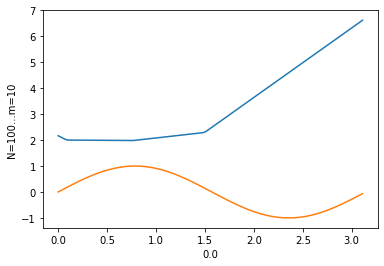

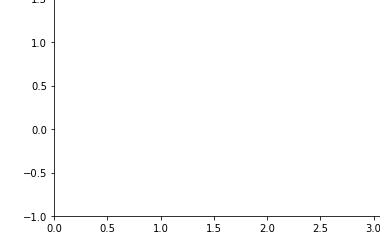

In [6]:
A=optimization(n,m,T,r)

In [ ]:
A

In [ ]:
x=t.tensor([R*(i/n) for i in range(n+1)])

In [ ]:
plt.plot(A[3])

In [ ]:
a=t.zeros(n+1)
for i in tqdm.tqdm(range(n+1)):
    a[i]=t.matmul(A[0],act(A[1]*x[i]+A[2]))

In [ ]:
plt.plot(x,a)
plt.plot(x,f(x))

In [ ]:
step(10)